In [9]:
import jax
import numpy as np
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

from uncprop.utils.plot import set_plot_theme
from uncprop.utils.grid import Grid, DensityComparisonGrid

from uncprop.models.vsem.vsemjax import (
    simulate_vsem_driver, 
    build_batch_forward_model,
    solve_vsem,
    plot_vsem_outputs,
    get_vsem_output_names,
)
from uncprop.models.vsem.inverse_problem import (
    VSEMPrior,
    VSEMLikelihood, 
    VSEM_DEFAULT_PARAMS,
)

colors = set_plot_theme()
key = jr.key(23562432)

In [ ]:
# plan: 
# - plot exact inverse problem / dgp using current setup
# - plot prior predictive dist
# - try varying one at a time
# - would emulating as a function of the transformed parameters be better?

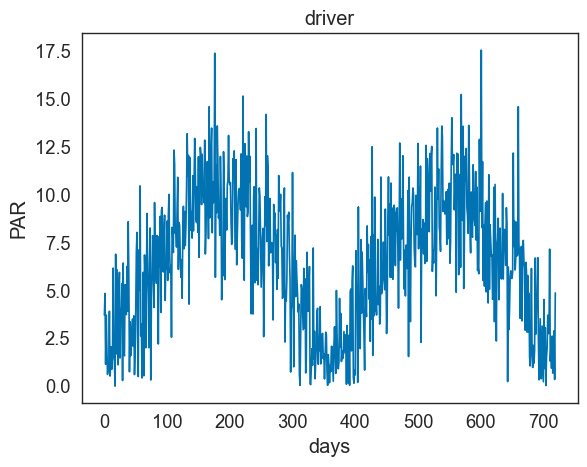

In [23]:
key, key_prior, key_driver, key_obs = jr.split(key, 4)

par_names = ['kext']
n_windows = 24
n_days_per_window = 30
n_days = n_windows * n_days_per_window

# prior on calibration parameters
prior = VSEMPrior(par_names)

# ground truth data generating process
all_true_param = prior.sample_all_vsem_params(key_prior)
time_steps, driver = simulate_vsem_driver(key_driver, n_days)

plt.plot(time_steps, driver)
plt.title('driver')
plt.xlabel('days')
plt.ylabel('PAR')
plt.show()

In [24]:
fwd = build_batch_forward_model(driver=driver,
                                par_names=par_names,
                                default_param_dict=VSEM_DEFAULT_PARAMS)

In [25]:
true_param = jnp.array([VSEM_DEFAULT_PARAMS[p] for p in par_names])

true_outputs = fwd(jnp.atleast_2d(true_param)).squeeze()

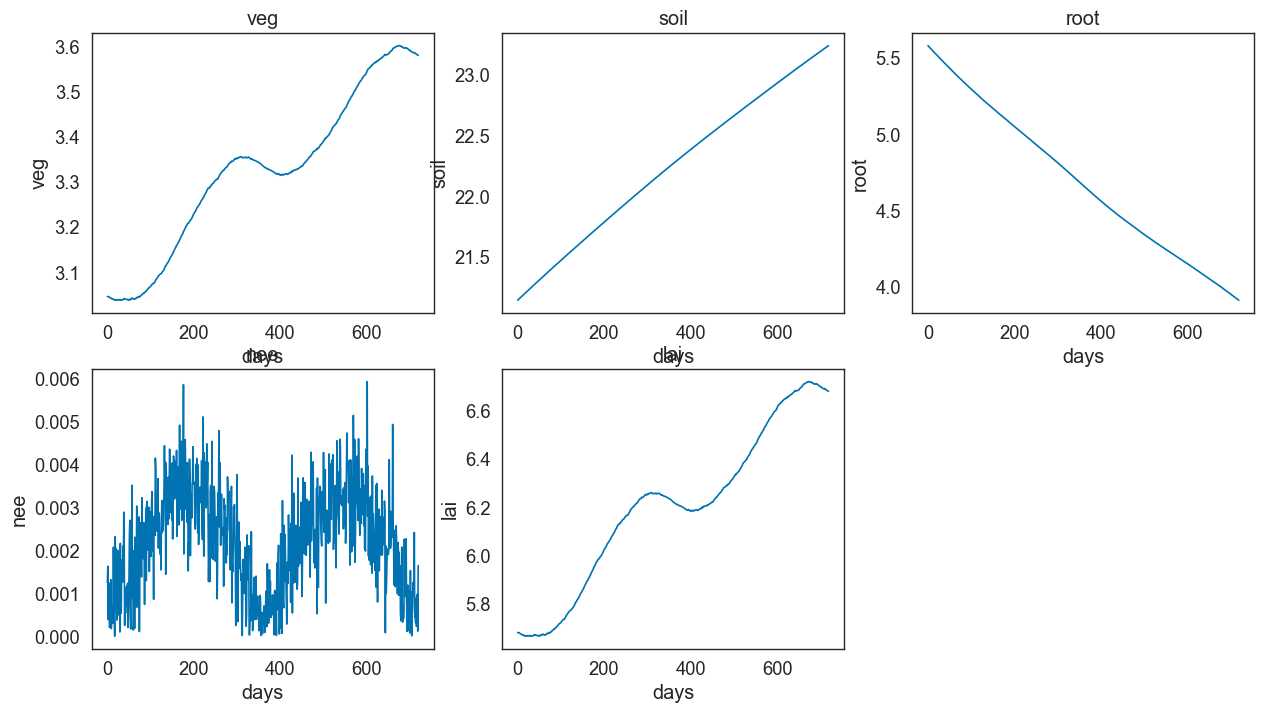

In [26]:
fig, axs = plot_vsem_outputs(output=true_outputs, nrows=2)

display(fig)

### Prior Predictive

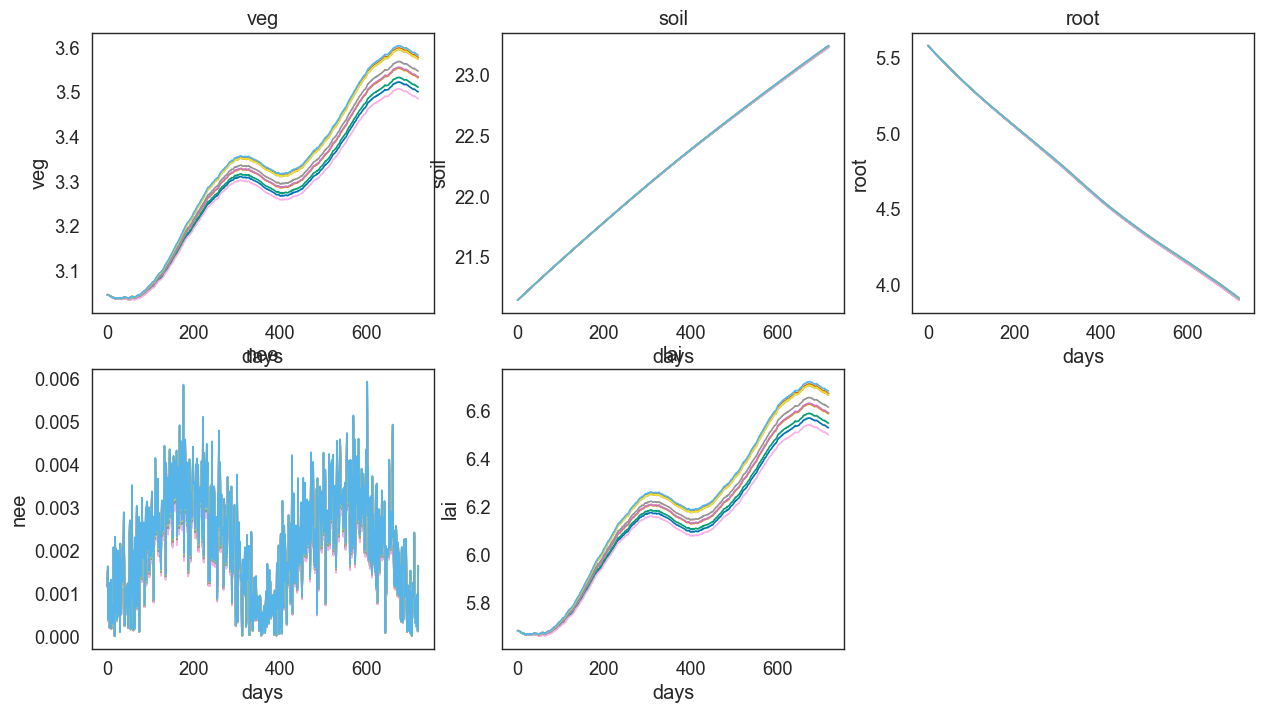

In [27]:
key, key_prior_samp = jr.split(key, 2)
prior_samp = prior.sample(key_prior_samp, 10)
prior_predictive = fwd(prior_samp)

fig, axs = plot_vsem_outputs(prior_predictive, nrows=2)
display(fig)

In [8]:
prior_predictive.shape

(10, 720, 5)